In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "data.csv"
data_raw = pd.read_csv(data_path)
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**Sample data:**")
data_raw.head()

Number of rows in data = 33944
Number of columns in data = 12


**Sample data:**


City             Place                                             Review  \
0  Agra  Rajeshwar Mandir  Though the city does not have much this kind o...   
1  Agra  Rajeshwar Mandir  When we plan a trip to Agra, we plan to visit ...   
2  Agra  Rajeshwar Mandir  Any ancient monument specially Mandir's have t...   
3  Agra  Rajeshwar Mandir  This is a very Old Shiva Temple ,earlier it wa...   
4  Agra  Rajeshwar Mandir  A very beautiful Mandir has to loose its grace...   

   Adventure & Outdoors  Spiritual  Nature & Retreat  Isolated or Hippie  \
0                     0          1                 1                   0   
1                     0          1                 1                   0   
2                     0          1                 1                   0   
3                     0          1                 1                   0   
4                     0          1                 1                   0   

   Heritage  Travel & Learn  Social Tourism (Volunteer & Travel)  \
0         0               0                                    0   
1         0               0                                    0   
2         0               0                                    0   
3         0               0                                    0   
4         0               0                                    0   

   Nightlife & Events  Shopping  
0                   0         0  
1                   0         0  
2                   0         0  
3                   0         0  
4                   0         0

['Adventure & Outdoors', 'Spiritual', 'Nature & Retreat', 'Isolated or Hippie', 'Heritage', 'Travel & Learn', 'Social Tourism (Volunteer & Travel)', 'Nightlife & Events', 'Shopping']
Adventure & Outdoors                    6144
Spiritual                               9135
Nature & Retreat                       26914
Isolated or Hippie                       322
Heritage                               25449
Travel & Learn                            22
Social Tourism (Volunteer & Travel)     1183
Nightlife & Events                       361
Shopping                                 974
dtype: int64


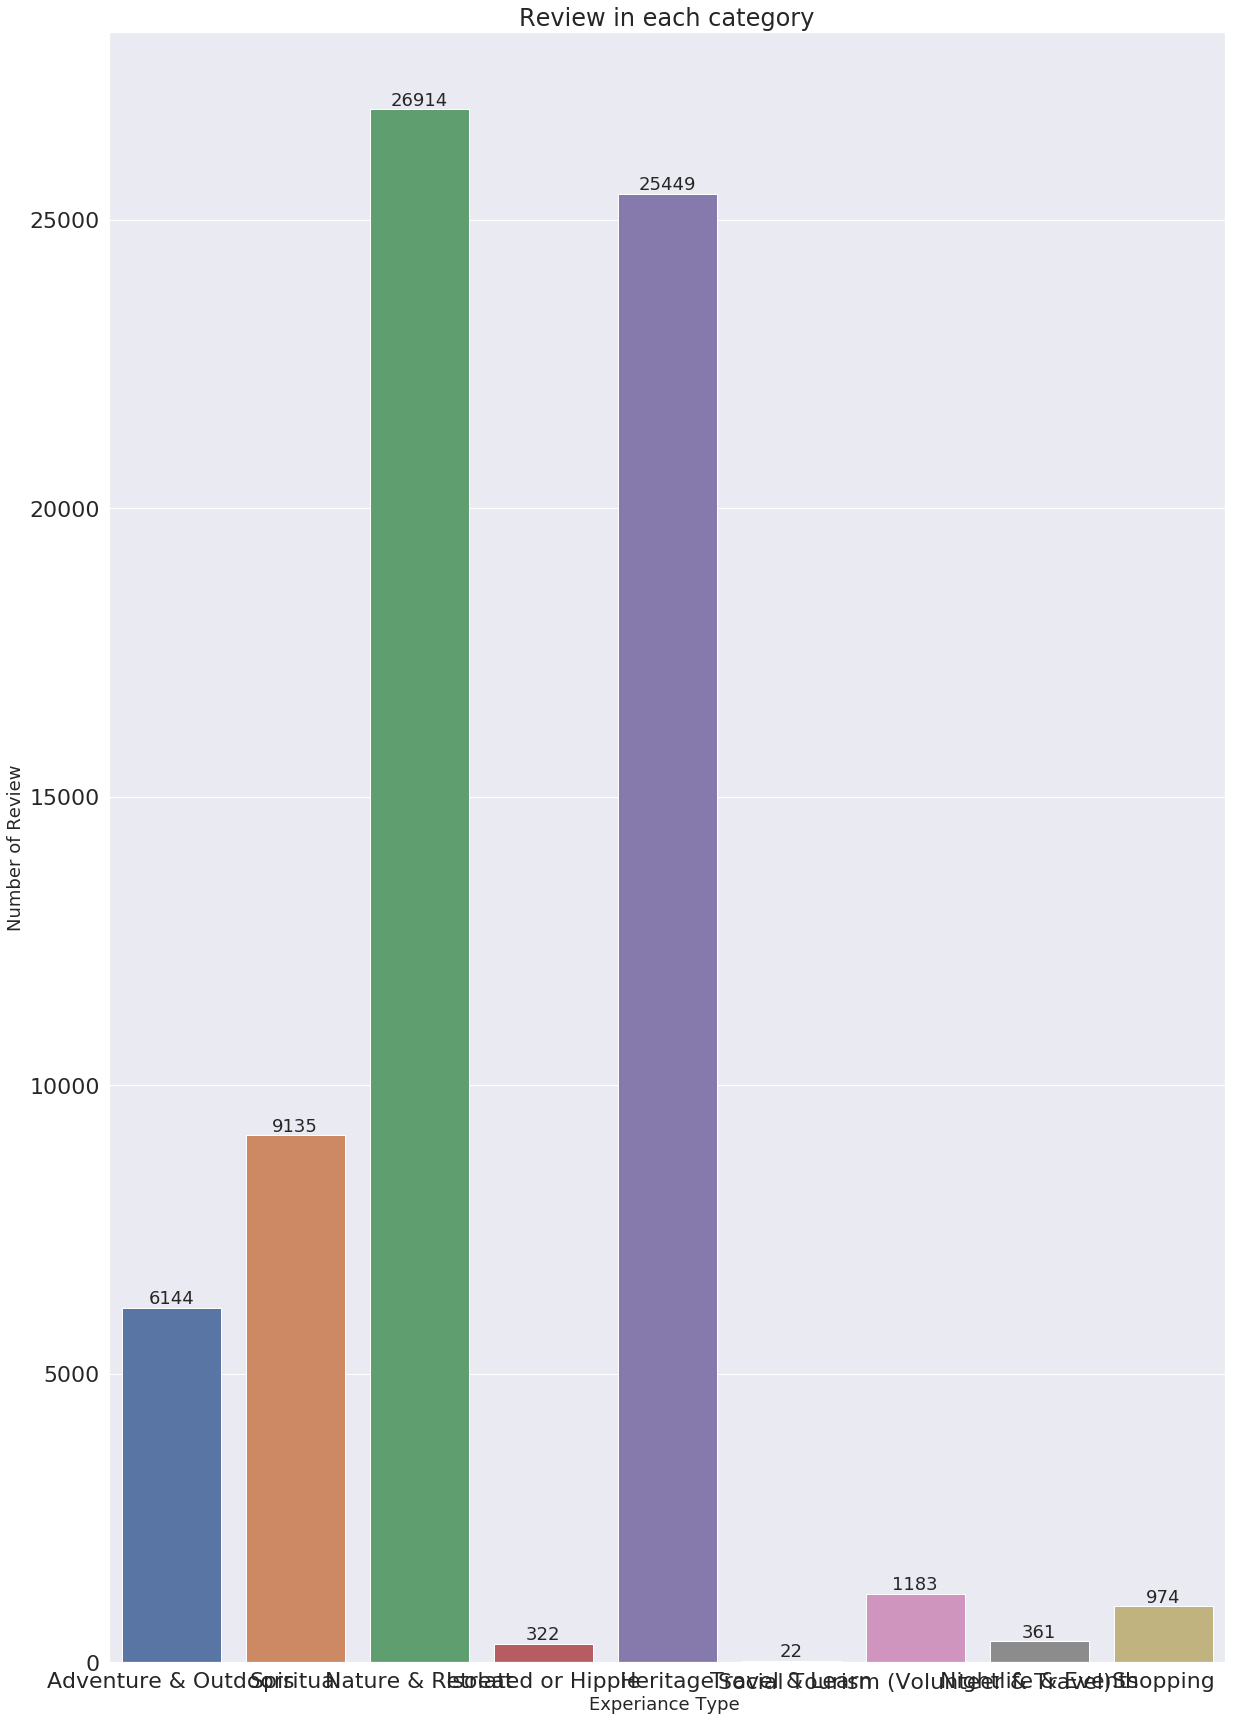

In [3]:
categories = list(data_raw.columns.values)[3:12]
print(categories)
sns.set(font_scale = 2)
plt.figure(figsize=(20,30))
print(data_raw.iloc[:,3:12].sum())
ax= sns.barplot(categories, data_raw.iloc[:,3:12].sum().values)
plt.title("Review in each category", fontsize=24)
plt.ylabel('Number of Review', fontsize=18)
plt.xlabel('Experiance Type ', fontsize=18)
#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,3:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

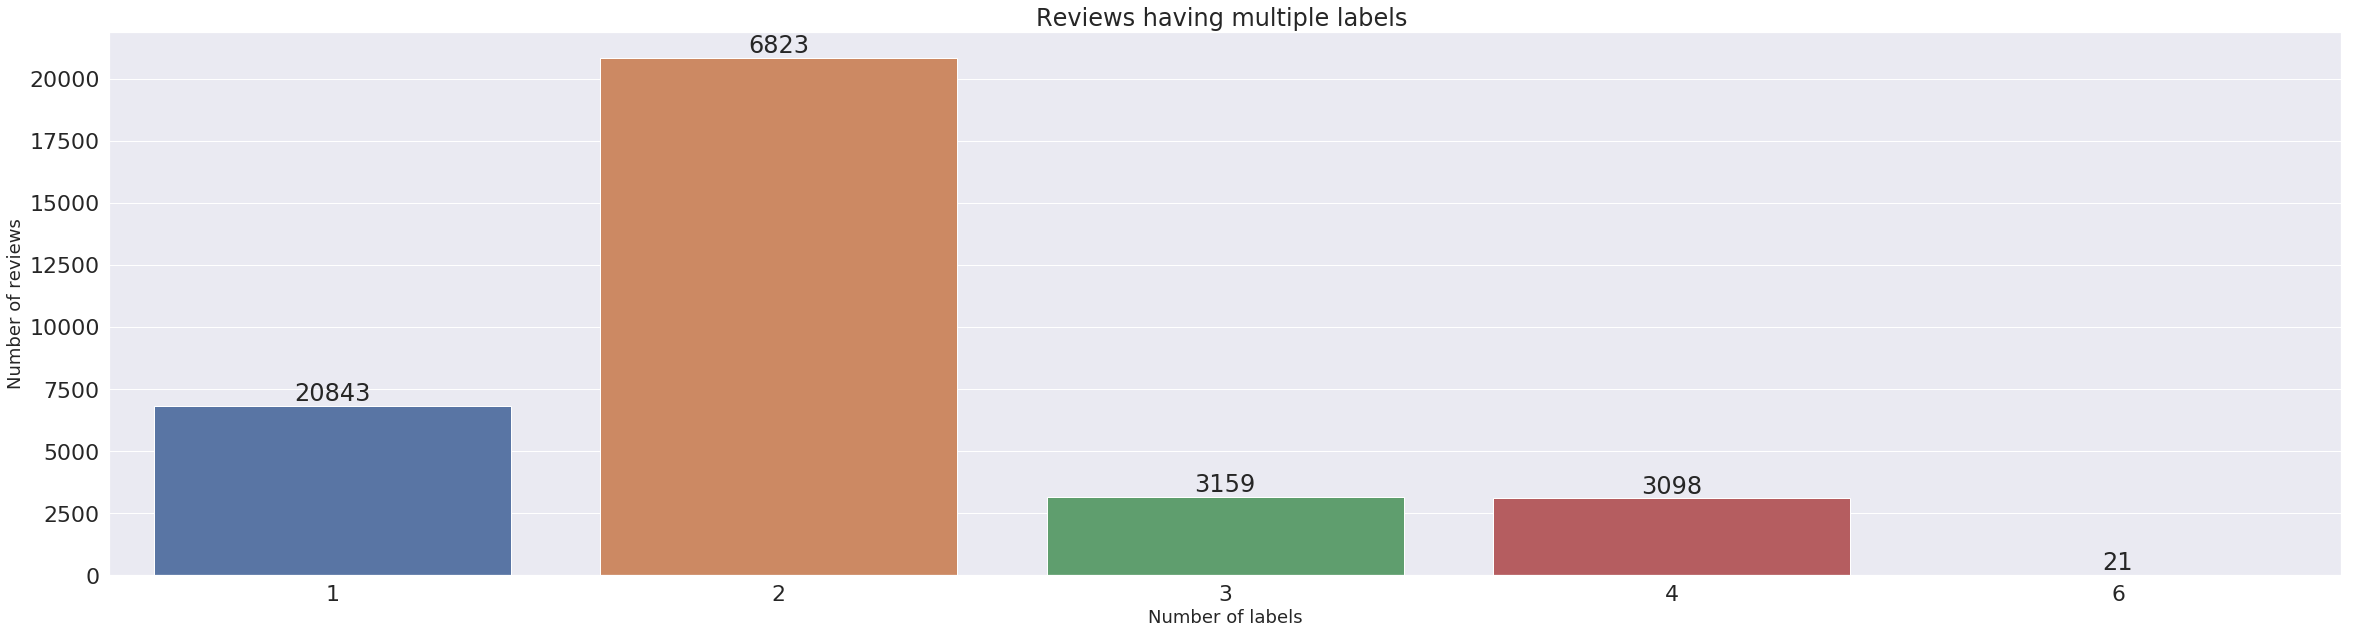

In [4]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[:]
sns.set(font_scale = 2)
plt.figure(figsize=(40,10))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Reviews having multiple labels ")
plt.ylabel('Number of reviews', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [5]:
#Data Pre-Processing

import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
data = data_raw
if not sys.warnoptions:
    warnings.simplefilter("ignore")
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
data['Review'] = data['Review'].str.lower()
data['Review'] = data['Review'].apply(cleanHtml)
data['Review'] = data['Review'].apply(cleanPunc)
data['Review'] = data['Review'].apply(keepAlpha)

In [6]:
#Removing stop words
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
data['Review'] = data['Review'].apply(removeStopWords)

In [7]:
#Stemming
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence
data['Review'] = data['Review'].apply(stemming)


In [8]:
# test and train data partitioning...

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)
original_test_data = test
print(train.shape)
print(test.shape)

(23760, 12)
(10184, 12)


In [9]:
train_text = train['Review']
test_text = test['Review']
#print("trian")
#print(train)
print("test")
print(test_text)

test
28892    look forward visit kunjapuri mandir read impor...
3776     beauti piec engin design archiitectur masonari...
23339    weather clear view amaz well worth trip notic ...
7266     almost pass visit agra fort fortun decid visit...
13416    build truli work genius inlay work symmetri ma...
26895    pushkar largest templ dedic lord brahma good s...
32277    laksham jhula offer great view mountain river ...
14280    found sloth bear eleph sanctuari accid heart r...
29027    locat superb landscap himalayan beauti worth g...
27982    left beatl ashram ruin place appar shut govt r...
15644    sheeshmah beauti fall love work histori beauti...
12430    tomb itimad ud daulah given monick babi taj co...
21794    good place mountain natur lover went trekk fun...
24278    perm shanti peach full p lase sun set cafe wel...
2299     far favourit home shah jahan design taj mahal ...
11011                time get far view taj mahal visit taj
22827    landour combin beauti quaint charm sophist

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [11]:
x_train = vectorizer.transform(train_text)
print("train_text")
print(train_text)
print("x_train")
print(x_train)
y_train = train.drop(labels = ['Review'], axis=1)
print(y_train)
x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['Review'], axis=1)

train_text
1083     agra fort main attract agra miss fort built mu...
17655    actual imagin emperor akbar take stroll even a...
29791    place right bank holi ganga clean tidi singer ...
9161     beauti place see real architectur piec mughal ...
22878    walk rokebi manor love walk accompani friend s...
27866    fortun raja richard devote maharishi mahesh yo...
14611    interest histori need good guid tell stori for...
20271    crowd peak season dirti bit rubbish float arou...
13205    tomb itimad ud daulah known babi taj beauti en...
23532    must local guid guid india sturi cultur arroun...
7172     wasnt expect visit place end surpris extra rup...
22051    excel view real peac heaven bodi love walk mor...
13302    tomb usual quiet offer unparallel chanc examin...
21236    kempti fall alway top list travel visit mussoo...
8874     enjoy walk around fort speak peopl fort huge amaz
20145    place lost charm becom tourist trap dirt filth...
4397     anoth great histor place visit whils

In [12]:
#Multiple Binary Classifications - (One Vs Rest Classifier)

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

arrs = []
for category in categories:
    printmd('**Processing {} review...**'.format(category))
    
    # Training logistic regression model on train data
    #print("x_train")
    #print(x_train)
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    #print("x_test")
    #print(x_test)
    prediction = LogReg_pipeline.predict(x_test)
    arrs.append(prediction)
    print("Prediction: ")
    print(prediction)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

output_array = []
output_array.append(['Review','Adventure & Outdoors', 'Spiritual', 'Nature & Retreat', 'Isolated or Hippie', 'Heritage', 'Travel & Learn', 'Social Tourism (Volunteer & Travel)', 'Nightlife & Events', 'Shopping'])
test_review = original_test_data["Review"].values
for index in range(0,len(test_review)):
    row = []
    row.append(test_review[index])
    for arr in arrs:
        row.append(arr[index])
    output_array.append(row)

    
with open('output.csv', 'w') as writeFile:
        writer = csv.writer(writeFile)
        writer.writerows(output_array)    
#print(output_array)    
        
    
    

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 14.3 µs


**Processing Adventure & Outdoors review...**

Prediction: 
[0 0 0 ... 0 0 0]
Test accuracy is 0.9181068342498037




**Processing Spiritual review...**

Prediction: 
[1 0 0 ... 0 0 0]
Test accuracy is 0.9258641005498822




**Processing Nature & Retreat review...**

Prediction: 
[1 1 1 ... 1 1 1]
Test accuracy is 0.8984681853888452




**Processing Isolated or Hippie review...**

Prediction: 
[0 0 0 ... 0 0 0]
Test accuracy is 0.9920463472113119




**Processing Heritage review...**

Prediction: 
[1 1 0 ... 1 1 0]
Test accuracy is 0.913688138256088




**Processing Travel & Learn review...**

Prediction: 
[0 0 0 ... 0 0 0]
Test accuracy is 0.9996072270227808




**Processing Social Tourism (Volunteer & Travel) review...**

Prediction: 
[0 0 0 ... 0 0 0]
Test accuracy is 0.9742733699921445




**Processing Nightlife & Events review...**

Prediction: 
[0 0 0 ... 0 0 0]
Test accuracy is 0.9899842890809112




**Processing Shopping review...**

Prediction: 
[0 0 0 ... 0 0 0]
Test accuracy is 0.9756480754124116


